# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama : Albertus Bagus Setyanto
- Email : albertusbagus217@gmail.com
- Id Dicoding : albertus_bagus

## Menentukan Pertanyaan Bisnis

1. Bagaimana penjualan (delivered) yang terjadi pada tahun 2016 sampai 2018?
2. Berapa lama proses pengiriman barang ke customer? Mulai dari pesanan dibuat sampai pesanan diterima customer. Apakah proses pengiriman sudah sesuai dengan estimasi waktu pengiriman yang dibuat oleh Olist Store?
3. Kategori produk apa saja yang menjadi favorit customer sepanjang periode 2016 sampai 2018?
4. Metode pembayaran apa saja yang banyak digunakan customer untuk bertransaksi sepanjang periode 2016 sampai 2018?
5. Bagaimana kepuasan customer terhadap pengalaman berbelanja di Olist Store? Apakah ada korelasi antara kepuasan customer dengan lama proses pengiriman?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt

## Data Wrangling

### Data Gathering

#### `customers_df`

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/olist_customers_dataset.csv")
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#### `items_df`

In [3]:
items_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/olist_order_items_dataset.csv")
items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### `payments_df`

In [4]:
payments_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/olist_order_payments_dataset.csv")
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


#### `reviews_df`

In [5]:
reviews_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/olist_order_reviews_dataset.csv")
reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### `orders_df`

In [6]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/olist_orders_dataset.csv")
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### `products_df`

In [7]:
products_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/olist_products_dataset.csv")
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### `sellers_df`

In [8]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/olist_sellers_dataset.csv")
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


#### `category_df`

In [9]:
category_df = pd.read_csv("https://raw.githubusercontent.com/albbagus/dicoding/main/product_category_name_translation.csv")
category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Assessing Data

#### `customers_df`

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
print("Jumlah duplikasi", customers_df.duplicated().sum())

Jumlah duplikasi 0


#### `items_df`

In [13]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
print("Jumlah duplikasi", items_df.duplicated().sum())

Jumlah duplikasi 0


In [16]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
items_df[items_df.price==items_df.price.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30


#### `payments_df`

In [18]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
print("Jumlah duplikasi", payments_df.duplicated().sum())

Jumlah duplikasi 0


In [21]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
payments_df[payments_df.payment_sequential==payments_df.payment_sequential.max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


In [23]:
payments_df[payments_df.payment_installments==payments_df.payment_installments.max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
2970,70b7e94ea46d3e8b5bc12a50186edaf0,1,credit_card,24,274.84
10791,859f516f2fc3f95772e63c5757ab0d5b,1,credit_card,24,609.56
12307,ff36cbc44b8f228e0449c92ef089c843,1,credit_card,24,756.49
18512,2b7dbe9be72b8f9733844c31055c0825,1,credit_card,24,345.39
21713,6ae2e8b8fac02522481d2a2f4ca4412c,1,credit_card,24,433.43
23024,90f864fe19d11549fa01eb81c4dd87e3,1,credit_card,24,588.58
36088,84d2098c97827c6327ed4d7be95e1fc8,1,credit_card,24,286.78
50401,ffb18bf111fa70edf316eb0390427986,1,credit_card,24,617.24
52846,63dbe0c8e63e5f1b4deec09d4f044a7f,1,credit_card,24,771.69
55094,fcbb6af360b31b05460c2c8e524588c0,1,credit_card,24,1194.38


In [24]:
payments_df[payments_df.payment_value==payments_df.payment_value.max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


#### `reviews_df`

In [25]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [26]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [27]:
print("Jumlah duplikasi:", reviews_df.duplicated().sum())

Jumlah duplikasi: 0


In [28]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### `orders_df`

In [29]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [30]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [31]:
print("Jumlah duplikasi", orders_df.duplicated().sum())

Jumlah duplikasi 0


#### `products_df`

In [32]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
print("Jumlah duplikasi:", products_df.duplicated().sum())

Jumlah duplikasi: 0


In [35]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### `sellers_df`

In [36]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [38]:
print("Jumlah duplikasi", sellers_df.duplicated().sum())

Jumlah duplikasi 0


#### `category_df`

In [39]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [41]:
print("Jumlah duplikasi", category_df.duplicated().sum())

Jumlah duplikasi 0


### Cleaning Data

#### `reviews_df`

In [42]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Missing value `reviews` terdapat pada kolom `review_comment_title` dan `review_comment_message`. Dengan kata lain, missing value tersebut adalah string berupa judul dan pesan review yang diberikan pelanggan Olist Store setelah pesanan barang telah diterima/selesai. Sehingga missing value ini hanya perlu diisi dengan string " ".

In [43]:
reviews_df.fillna(value=" ", inplace=True)
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### `orders_df`

In [44]:
datetime_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [45]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Urutan `order-status`

1. purchase
- created

2. approval
- approved
- invoiced
- processing
- canceled
- unavailable

3. carrier
- shipped

4. customer
- delivered


In [46]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [47]:
orders_df.groupby(by='order_status').customer_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

##### Mengatasi missing value pada kolom `order_approved_at`

In [48]:
approved = orders_df[orders_df.order_approved_at.isna()==True]
approved

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [49]:
approved.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
canceled     141
delivered     14
created        5
Name: order_id, dtype: int64

In [50]:
approved_time = orders_df['order_approved_at']-orders_df['order_purchase_timestamp']

approved_canceled = approved[approved.order_status=='canceled']
approved_delivered = approved[approved.order_status=='delivered']

approved_canceled['order_approved_at'] = approved_canceled['order_purchase_timestamp'] + approved_time.mean()
approved_delivered['order_approved_at'] = approved_delivered['order_purchase_timestamp'] + approved_time.mean()

approved[approved.order_status=='canceled'] = approved_canceled
approved[approved.order_status=='delivered'] = approved_delivered

orders_df[orders_df.order_approved_at.isna()==True] = approved

approved[approved.order_approved_at.isna()==True].groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\3619142896.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_canceled['order_approved_at'] = approved_canceled['order_purchase_timestamp'] + approved_time.mean()
C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\3619142896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_delivered['order_approved_at'] = approved_delivered['order_purchase_timestamp'] + approved_time.mean()
C:\Users\Albertus Bagus\AppData\Local\Temp\ipyke

order_status
created    5
Name: order_id, dtype: int64

##### Mengatasi missing value pada kolom `order_delivered_carrier_date`

In [51]:
carrier = orders_df[orders_df.order_delivered_carrier_date.isna()==True]
carrier

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000000000,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000000000,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000000000,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57.000000000,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05.000000000,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-09-01 02:38:52.739486910,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000000000,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-07 05:10:55.739486910,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,NaT,NaT,2017-09-15


In [52]:
carrier.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_id, dtype: int64

In [53]:
carrier_time = orders_df['order_delivered_carrier_date']-orders_df['order_approved_at']

carrier_delivered = carrier[carrier.order_status=='delivered']

carrier_delivered['order_delivered_carrier_date'] = carrier_delivered['order_approved_at']+carrier_time.mean()

carrier[carrier.order_status=='delivered'] = carrier_delivered

orders_df[orders_df.order_delivered_carrier_date.isna()==True] = carrier

carrier[carrier.order_delivered_carrier_date.isna()==True].groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\2405883070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_delivered['order_delivered_carrier_date'] = carrier_delivered['order_approved_at']+carrier_time.mean()
C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\2405883070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier[carrier.order_status=='delivered'] = carrier_delivered


order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
Name: order_id, dtype: int64

##### Menangani missing value pada kolom `order_delivered_customer_date`

In [54]:
delicust = orders_df[orders_df.order_delivered_customer_date.isna()==True]
delicust

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000000000,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18.000000000,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000000000,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000000000,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30.000000000,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-09-01 02:38:52.739486910,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000000000,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-07 05:10:55.739486910,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,NaT,NaT,2017-09-15


In [55]:
delicust.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_id, dtype: int64

In [56]:
delicust_time = orders_df['order_delivered_customer_date']-orders_df['order_delivered_carrier_date']

delicust_delivered = delicust[delicust.order_status=='delivered']

delicust_delivered['order_delivered_customer_date'] = delicust_delivered['order_delivered_carrier_date']+delicust_time.mean()

delicust[delicust.order_status=='delivered'] = delicust_delivered

orders_df[orders_df.order_delivered_customer_date.isna()==True] = delicust

delicust[delicust.order_delivered_carrier_date.isna()==True].groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\1435542397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delicust_delivered['order_delivered_customer_date'] = delicust_delivered['order_delivered_carrier_date']+delicust_time.mean()
C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\1435542397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delicust[delicust.order_status=='delivered'] = delicust_delivered


order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
Name: order_id, dtype: int64

#### `products_df`

In [57]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [58]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [59]:
products_df[products_df.product_category_name.isna()==True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [60]:
products_df.product_category_name.fillna(value="unknown", inplace=True)
products_df.product_name_lenght.fillna(value=0, inplace=True)
products_df.product_description_lenght.fillna(value=0, inplace=True)
products_df.product_photos_qty.fillna(value=0, inplace=True)

products_df[products_df.product_category_name.isna()==True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


Berdasarkan pengamatan di atas, missing value pada kolom `product_category_name` ditangani dengan memasukkan nilai string `'unknown'`. Sedangkan missing value pada kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty` ditangani dengan memasukkan nilai `0`, dengan asumsi bahwa produk tersebut tidak memiliki deskripsi sama sekali.

In [61]:
products_df[products_df.product_weight_g.isna()==True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,unknown,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Terdapat 2 baris tersisa yang masih memiliki missing value, setiap baris akan mendapatkan penanganan yang berbeda karena memiliki `product_category_name` berbeda yang memungkinkan karakteristik berat dan ukuran yang berbeda.

Masing-masing baris akan diisi dengan nilai mode dari kolom tersebut sesuai dengan `product_category_name` yang dimiliki.

In [62]:
products_df.product_category_name.fillna(value="unknown", inplace=True)
products_df.product_name_lenght.fillna(value=0, inplace=True)
products_df.product_description_lenght.fillna(value=0, inplace=True)
products_df.product_photos_qty.fillna(value=0, inplace=True)

products_df[products_df.product_category_name.isna()==True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [63]:
products_df[products_df.product_weight_g.isna()==True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,unknown,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [64]:
products_df.iloc[8578,[5,6,7,8]] = [stats.mode(products_df.product_weight_g[products_df.product_category_name=='bebes'])[0][0],
                                    stats.mode(products_df.product_length_cm[products_df.product_category_name=='bebes'])[0][0],
                                    stats.mode(products_df.product_height_cm[products_df.product_category_name=='bebes'])[0][0],
                                    stats.mode(products_df.product_width_cm[products_df.product_category_name=='bebes'])[0][0]]
products_df[products_df.product_weight_g.isna()==True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18851,5eb564652db742ff8f28759cd8d2652a,unknown,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [65]:
products_df.iloc[18851,[5,6,7,8]] = [stats.mode(products_df.product_weight_g[products_df.product_category_name=='unknown'])[0][0],
                                     stats.mode(products_df.product_length_cm[products_df.product_category_name=='unknown'])[0][0],
                                     stats.mode(products_df.product_height_cm[products_df.product_category_name=='unknown'])[0][0],
                                     stats.mode(products_df.product_width_cm[products_df.product_category_name=='unknown'])[0][0]]
products_df[products_df.product_weight_g.isna()==True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [66]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Eksplorasi penjualan pada periode 2016 sampai 2018 dan eksplorasi pengiriman pesananan

In [67]:
delivered = orders_df[orders_df.order_status=='delivered']
delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


#### Melihat tren penjualan

In [68]:
delivered['order_delivered_customer_date'].describe()

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\2813037038.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delivered['order_delivered_customer_date'].describe()


count                   96478
unique                  95665
top       2018-07-24 21:36:42
freq                        3
first     2016-10-11 13:46:32
last      2018-10-17 13:22:46
Name: order_delivered_customer_date, dtype: object

In [69]:
delivered['delivered_month'] = delivered['order_delivered_customer_date'].dt.strftime('%Y-%m')
delivered['delivered_month']

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\385991702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivered_month'] = delivered['order_delivered_customer_date'].dt.strftime('%Y-%m')


0        2017-10
1        2018-08
2        2018-08
3        2017-12
4        2018-02
          ...   
99436    2017-03
99437    2018-02
99438    2017-09
99439    2018-01
99440    2018-03
Name: delivered_month, Length: 96478, dtype: object

In [70]:
tren = delivered.groupby(by="delivered_month").agg({
        'order_id':'nunique'
        }).reset_index().sort_index()
tren

,delivered_month,order_id
0,2016-10,205
1,2016-11,58
2,2016-12,4
3,2017-01,283
4,2017-02,1351
5,2017-03,2382
6,2017-04,1849
7,2017-05,3751
8,2017-06,3224
9,2017-07,3455


Terlihat bahwa penjualan (terkirim) paling sedikit dalam periode ini adalah pada bulan Oktober 2016 berjumlah 2 dan penjualan (terkirim) paling banyak dalam periode ini adalah pada bulan Agustus 2018 berjumlah 9181.

### Lama waktu pengiriman dari pesanan dibuat sampai diterima pelanggan

In [71]:
delivered['delivered_time'] = np.ceil((delivered['order_delivered_customer_date']-delivered['order_purchase_timestamp']).dt.days)
delivered['delivered_time'].describe()

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\2376452398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivered_time'] = np.ceil((delivered['order_delivered_customer_date']-delivered['order_purchase_timestamp']).dt.days)


count    96478.000000
mean        12.093596
std          9.550997
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivered_time, dtype: float64

In [72]:
def category_delivery(day):
  if day == 0:
    return 'same_day'
  if day <= 6:
    return '<=6 day'
  if day <= 10:
    return '<=10 day'
  if day <= 15:
    return '<=15 day'
  else:
    return 'more than 15 day'

delivered['delivered_time_cat'] = delivered['delivered_time'].apply(category_delivery)
delivered

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\1990738446.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivered_time_cat'] = delivered['delivered_time'].apply(category_delivery)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_month,delivered_time,delivered_time_cat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,<=10 day
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,13.0,<=15 day
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,<=10 day
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,13.0,<=15 day
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,2.0,<=6 day
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03,8.0,<=10 day
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02,22.0,more than 15 day
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,24.0,more than 15 day
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01,17.0,more than 15 day


In [73]:
del_cat = delivered.groupby(by='delivered_time_cat').agg({
        'order_id':'nunique'
        }).reset_index().sort_values(by='order_id', ascending=False)
del_cat

,delivered_time_cat,order_id
0,<=10 day,26052
2,<=6 day,26032
3,more than 15 day,23207
1,<=15 day,21174
4,same_day,13


#### Perbandingan antara lama waktu pengiriman sebenarnya dengan lama waktu yang diestimasi

In [74]:
delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_month,delivered_time,delivered_time_cat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,<=10 day
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,13.0,<=15 day
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,<=10 day
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,13.0,<=15 day
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,2.0,<=6 day
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03,8.0,<=10 day
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02,22.0,more than 15 day
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,24.0,more than 15 day
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01,17.0,more than 15 day


In [75]:
delivered['estimated_time'] = np.ceil((delivered['order_estimated_delivery_date']-delivered['order_purchase_timestamp']).dt.days)
delivered['estimated_time'].describe()

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\656249088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['estimated_time'] = np.ceil((delivered['order_estimated_delivery_date']-delivered['order_purchase_timestamp']).dt.days)


count    96478.000000
mean        23.372759
std          8.758137
min          2.000000
25%         18.000000
50%         23.000000
75%         28.000000
max        155.000000
Name: estimated_time, dtype: float64

In [76]:
delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_month,delivered_time,delivered_time_cat,estimated_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,<=10 day,15.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,13.0,<=15 day,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,<=10 day,26.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,13.0,<=15 day,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,2.0,<=6 day,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03,8.0,<=10 day,18.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02,22.0,more than 15 day,23.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,24.0,more than 15 day,30.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01,17.0,more than 15 day,37.0


In [77]:
delivered['diff_est_del'] = delivered['estimated_time'] - delivered['delivered_time']
delivered

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\1837656452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['diff_est_del'] = delivered['estimated_time'] - delivered['delivered_time']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_month,delivered_time,delivered_time_cat,estimated_time,diff_est_del
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,<=10 day,15.0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,13.0,<=15 day,19.0,6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,<=10 day,26.0,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,13.0,<=15 day,26.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,2.0,<=6 day,12.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03,8.0,<=10 day,18.0,10.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02,22.0,more than 15 day,23.0,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,24.0,more than 15 day,30.0,6.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01,17.0,more than 15 day,37.0,20.0


In [78]:
def category_est_del(diff):
  if (diff) == 0:
    return 'same_day'
  if (diff) > 0:
    return 'on_time'
  else:
    return 'late'

delivered['est_cat'] = delivered['diff_est_del'].apply(category_est_del)
delivered

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\2782508778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['est_cat'] = delivered['diff_est_del'].apply(category_est_del)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_month,delivered_time,delivered_time_cat,estimated_time,diff_est_del,est_cat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,<=10 day,15.0,7.0,on_time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,13.0,<=15 day,19.0,6.0,on_time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,<=10 day,26.0,17.0,on_time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,13.0,<=15 day,26.0,13.0,on_time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,2.0,<=6 day,12.0,10.0,on_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03,8.0,<=10 day,18.0,10.0,on_time
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02,22.0,more than 15 day,23.0,1.0,on_time
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,24.0,more than 15 day,30.0,6.0,on_time
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01,17.0,more than 15 day,37.0,20.0,on_time


In [79]:
estimated_cat = delivered.groupby(by='est_cat').agg({
        'order_id':'nunique'
        }).reset_index().sort_values(by='order_id', ascending=False)
estimated_cat

,est_cat,order_id
1,on_time,87791
0,late,7307
2,same_day,1380


#### Drop kolom yang sudah tidak diperlukan lagi

In [80]:
delivered.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date'],axis=1,inplace=True)
delivered

C:\Users\Albertus Bagus\AppData\Local\Temp\ipykernel_9552\2722112486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date'],axis=1,inplace=True)


,order_id,customer_id,order_status,order_delivered_customer_date,delivered_month,delivered_time,delivered_time_cat,estimated_time,diff_est_del,est_cat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10,8.0,<=10 day,15.0,7.0,on_time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08,13.0,<=15 day,19.0,6.0,on_time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-08,9.0,<=10 day,26.0,17.0,on_time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12,13.0,<=15 day,26.0,13.0,on_time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02,2.0,<=6 day,12.0,10.0,on_time
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01,2017-03,8.0,<=10 day,18.0,10.0,on_time
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56,2018-02,22.0,more than 15 day,23.0,1.0,on_time
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17,2017-09,24.0,more than 15 day,30.0,6.0,on_time
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-01,17.0,more than 15 day,37.0,20.0,on_time


In [81]:
delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_delivered_customer_date  96478 non-null  datetime64[ns]
 4   delivered_month                96478 non-null  object        
 5   delivered_time                 96478 non-null  float64       
 6   delivered_time_cat             96478 non-null  object        
 7   estimated_time                 96478 non-null  float64       
 8   diff_est_del                   96478 non-null  float64       
 9   est_cat                        96478 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 8.1+ MB


### Eksplorasi kategori favorit pada periode 2016 sampai 2018

#### Menggabungkan `delivered` dengan `items_df`

In [82]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [83]:
delivered_item = pd.merge(delivered,items_df[['order_id','order_item_id','product_id','seller_id','price']],on='order_id',how='inner')
columns = delivered_item.columns.tolist()
columns = [columns[0], columns[1], columns[11], columns[12], columns[10], columns[13], columns[2], columns[3], columns[4], columns[5], columns[6], columns[7], columns[8], columns[9]]
delivered_item = delivered_item[columns]
delivered_item

,order_id,customer_id,product_id,seller_id,order_item_id,price,order_status,order_delivered_customer_date,delivered_month,delivered_time,delivered_time_cat,estimated_time,diff_est_del,est_cat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,delivered,2017-10-10 21:25:13,2017-10,8.0,<=10 day,15.0,7.0,on_time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1,118.70,delivered,2018-08-07 15:27:45,2018-08,13.0,<=15 day,19.0,6.0,on_time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,delivered,2018-08-17 18:06:29,2018-08,9.0,<=10 day,26.0,17.0,on_time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,1,45.00,delivered,2017-12-02 00:28:42,2017-12,13.0,<=15 day,26.0,13.0,on_time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,1,19.90,delivered,2018-02-16 18:17:02,2018-02,2.0,<=6 day,12.0,10.0,on_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,1,174.90,delivered,2018-02-28 17:37:56,2018-02,22.0,more than 15 day,23.0,1.0,on_time
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,1,205.99,delivered,2017-09-21 11:24:17,2017-09,24.0,more than 15 day,30.0,6.0,on_time
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1,179.99,delivered,2018-01-25 23:32:54,2018-01,17.0,more than 15 day,37.0,20.0,on_time
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2,179.99,delivered,2018-01-25 23:32:54,2018-01,17.0,more than 15 day,37.0,20.0,on_time


In [84]:
delivered_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   customer_id                    110197 non-null  object        
 2   product_id                     110197 non-null  object        
 3   seller_id                      110197 non-null  object        
 4   order_item_id                  110197 non-null  int64         
 5   price                          110197 non-null  float64       
 6   order_status                   110197 non-null  object        
 7   order_delivered_customer_date  110197 non-null  datetime64[ns]
 8   delivered_month                110197 non-null  object        
 9   delivered_time                 110197 non-null  float64       
 10  delivered_time_cat             110197 non-null  object        
 11  

#### Menggabungkan `delivered_item` dengan `products_df`

In [85]:
delivered_product = pd.merge(delivered_item,products_df[['product_id','product_category_name']],on='product_id',how='inner')
delivered_product = pd.merge(delivered_product,category_df,on='product_category_name',how='left')
columns = delivered_product.columns.tolist()
columns = [columns[0], columns[1], columns[2], columns[3], columns[4], columns[15], columns[14], columns[5], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11], columns[12], columns[13]]
delivered_product = delivered_product[columns]
delivered_product

,order_id,customer_id,product_id,seller_id,order_item_id,product_category_name_english,product_category_name,price,order_status,order_delivered_customer_date,delivered_month,delivered_time,delivered_time_cat,estimated_time,diff_est_del,est_cat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,2017-10,8.0,<=10 day,15.0,7.0,on_time
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-08-18 14:44:43,2017-08,2.0,<=6 day,12.0,10.0,on_time
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-08-07 18:30:01,2017-08,5.0,<=6 day,12.0,7.0,on_time
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-11-07 18:04:59,2017-11,14.0,<=15 day,20.0,6.0,on_time
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1,perfumery,perfumaria,118.70,delivered,2018-08-07 15:27:45,2018-08,13.0,<=15 day,19.0,6.0,on_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,1,sports_leisure,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,2017-08,12.0,<=15 day,20.0,8.0,on_time
110193,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2,sports_leisure,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,2017-08,12.0,<=15 day,20.0,8.0,on_time
110194,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,1,musical_instruments,instrumentos_musicais,55.90,delivered,2018-01-26 15:45:14,2018-01,37.0,more than 15 day,28.0,-9.0,late
110195,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1,health_beauty,beleza_saude,72.00,delivered,2017-03-17 15:08:01,2017-03,8.0,<=10 day,18.0,10.0,on_time


In [86]:
delivered_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   customer_id                    110197 non-null  object        
 2   product_id                     110197 non-null  object        
 3   seller_id                      110197 non-null  object        
 4   order_item_id                  110197 non-null  int64         
 5   product_category_name_english  108638 non-null  object        
 6   product_category_name          110197 non-null  object        
 7   price                          110197 non-null  float64       
 8   order_status                   110197 non-null  object        
 9   order_delivered_customer_date  110197 non-null  datetime64[ns]
 10  delivered_month                110197 non-null  object        
 11  

#### Kategori produk favorit

In [87]:
favorite_category = delivered_product.groupby(by='product_category_name_english').agg({
    'order_id':'nunique'
}).reset_index().sort_values(by='order_id',ascending=False)
favorite_category

,product_category_name_english,order_id
7,bed_bath_table,9272
43,health_beauty,8647
65,sports_leisure,7530
15,computers_accessories,6530
39,furniture_decor,6307
...,...,...
3,arts_and_craftmanship,23
52,la_cuisine,13
11,cds_dvds_musicals,12
29,fashion_childrens_clothes,7


In [88]:
delivered_product['delivered_month'] = pd.to_datetime(delivered_product['delivered_month'])
delivered_product['year_month'] = delivered_product['delivered_month'].dt.to_period('M')

fav_cat = delivered_product.groupby(['year_month', 'product_category_name_english']).agg({
    'order_id':'nunique'
}).reset_index().sort_values(by='order_id',ascending=False)
fav_cat = fav_cat.sort_values(['year_month', 'order_id'], ascending=[True, False])
fav_cat = fav_cat.drop_duplicates(subset='year_month')

fav_cat

,year_month,product_category_name_english,order_id
15,2016-10,furniture_decor,40
38,2016-11,health_beauty,10
46,2016-12,auto,1
63,2017-01,furniture_decor,62
102,2017-02,furniture_decor,170
154,2017-03,furniture_decor,289
185,2017-04,bed_bath_table,196
238,2017-05,bed_bath_table,323
295,2017-06,bed_bath_table,321
355,2017-07,bed_bath_table,461


### Eksplorasi metode pembayaran yang banyak digunakan

In [89]:
delivered_method = pd.merge(delivered_product,payments_df,on='order_id',how='inner')
delivered_method

,order_id,customer_id,product_id,seller_id,order_item_id,product_category_name_english,product_category_name,price,order_status,order_delivered_customer_date,...,delivered_time,delivered_time_cat,estimated_time,diff_est_del,est_cat,year_month,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,...,8.0,<=10 day,15.0,7.0,on_time,2017-10,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,...,8.0,<=10 day,15.0,7.0,on_time,2017-10,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,...,8.0,<=10 day,15.0,7.0,on_time,2017-10,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-08-18 14:44:43,...,2.0,<=6 day,12.0,10.0,on_time,2017-08,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-08-07 18:30:01,...,5.0,<=6 day,12.0,7.0,on_time,2017-08,1,credit_card,1,37.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,1,sports_leisure,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,...,12.0,<=15 day,20.0,8.0,on_time,2017-08,1,credit_card,10,748.24
115031,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2,sports_leisure,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,...,12.0,<=15 day,20.0,8.0,on_time,2017-08,1,credit_card,10,748.24
115032,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,1,musical_instruments,instrumentos_musicais,55.90,delivered,2018-01-26 15:45:14,...,37.0,more than 15 day,28.0,-9.0,late,2018-01,1,credit_card,1,71.04
115033,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1,health_beauty,beleza_saude,72.00,delivered,2017-03-17 15:08:01,...,8.0,<=10 day,18.0,10.0,on_time,2017-03,1,credit_card,3,85.08


In [90]:
delivered_method.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115035 entries, 0 to 115034
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115035 non-null  object        
 1   customer_id                    115035 non-null  object        
 2   product_id                     115035 non-null  object        
 3   seller_id                      115035 non-null  object        
 4   order_item_id                  115035 non-null  int64         
 5   product_category_name_english  113384 non-null  object        
 6   product_category_name          115035 non-null  object        
 7   price                          115035 non-null  float64       
 8   order_status                   115035 non-null  object        
 9   order_delivered_customer_date  115035 non-null  datetime64[ns]
 10  delivered_month                115035 non-null  datetime64[ns]
 11  

In [91]:
favorite_payment = delivered_method.groupby(by='payment_type').agg({
    'order_id':'nunique',
    'payment_value':'sum'
}).reset_index().sort_values(by='order_id',ascending=False)
favorite_payment

,payment_type,order_id,payment_value
1,credit_card,74304,15190241.73
0,boleto,19191,3943080.78
3,voucher,3679,396110.42
2,debit_card,1485,246727.51


In [92]:
delivered_method['delivered_month'] = pd.to_datetime(delivered_method['delivered_month'])
delivered_method['year_month'] = delivered_method['delivered_month'].dt.to_period('M')

fav_pay = delivered_method.groupby(['year_month', 'payment_type']).agg({
    'order_id':'nunique'
}).reset_index().sort_values(by='order_id',ascending=False)
fav_pay = fav_pay.sort_values(['year_month', 'order_id'], ascending=[True, False])
fav_pay = fav_pay.drop_duplicates(subset='year_month')

fav_pay

,year_month,payment_type,order_id
1,2016-10,credit_card,160
5,2016-11,credit_card,46
8,2016-12,credit_card,3
10,2017-01,credit_card,201
14,2017-02,credit_card,1018
18,2017-03,credit_card,1795
22,2017-04,credit_card,1403
26,2017-05,credit_card,2854
30,2017-06,credit_card,2442
34,2017-07,credit_card,2614


### Eksplorasi review customer

In [93]:
delivered_review = pd.merge(delivered_method,reviews_df[['order_id','review_score','review_comment_message']],on='order_id',how='inner')
delivered_review

,order_id,customer_id,product_id,seller_id,order_item_id,product_category_name_english,product_category_name,price,order_status,order_delivered_customer_date,...,estimated_time,diff_est_del,est_cat,year_month,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,...,15.0,7.0,on_time,2017-10,1,credit_card,1,18.12,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,...,15.0,7.0,on_time,2017-10,3,voucher,1,2.00,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,...,15.0,7.0,on_time,2017-10,2,voucher,1,18.59,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-08-18 14:44:43,...,12.0,10.0,on_time,2017-08,1,credit_card,3,37.77,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,housewares,utilidades_domesticas,29.99,delivered,2017-08-07 18:30:01,...,12.0,7.0,on_time,2017-08,1,credit_card,1,37.77,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114854,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,1,sports_leisure,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,...,20.0,8.0,on_time,2017-08,1,credit_card,10,748.24,4,
114855,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2,sports_leisure,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,...,20.0,8.0,on_time,2017-08,1,credit_card,10,748.24,4,
114856,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,1,musical_instruments,instrumentos_musicais,55.90,delivered,2018-01-26 15:45:14,...,28.0,-9.0,late,2018-01,1,credit_card,1,71.04,1,"Ele não é um mini cajon, é um shaker, ou seja,..."
114857,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1,health_beauty,beleza_saude,72.00,delivered,2017-03-17 15:08:01,...,18.0,10.0,on_time,2017-03,1,credit_card,3,85.08,5,


In [94]:
delivered_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114859 entries, 0 to 114858
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114859 non-null  object        
 1   customer_id                    114859 non-null  object        
 2   product_id                     114859 non-null  object        
 3   seller_id                      114859 non-null  object        
 4   order_item_id                  114859 non-null  int64         
 5   product_category_name_english  113210 non-null  object        
 6   product_category_name          114859 non-null  object        
 7   price                          114859 non-null  float64       
 8   order_status                   114859 non-null  object        
 9   order_delivered_customer_date  114859 non-null  datetime64[ns]
 10  delivered_month                114859 non-null  datetime64[ns]
 11  

In [95]:
delivered_review.drop_duplicates(inplace=True)
delivered_review.duplicated().sum()

0

In [96]:
review = delivered_review.groupby(by='review_score').agg({
    'order_id':'nunique'
}).reset_index().sort_values(by='review_score',ascending=True)
review

,review_score,order_id
0,1,9380
1,2,2938
2,3,7942
3,4,18943
4,5,56817


In [97]:
cat_review = delivered_review.groupby('product_category_name_english', as_index=False).agg({
    'review_score':'mean',
    'order_id':'nunique'
}).sort_values('review_score',ascending=False)
cat_review

,product_category_name_english,review_score,order_id
29,fashion_childrens_clothes,5.000000,7
11,cds_dvds_musicals,4.642857,12
9,books_imported,4.525424,50
8,books_general_interest,4.502752,492
64,small_appliances_home_oven_and_coffee,4.453333,72
...,...,...,...
30,fashion_male_clothing,3.649635,105
46,home_comfort_2,3.642857,23
57,office_furniture,3.552376,1244
23,diapers_and_hygiene,3.378378,25


In [98]:
deli_cat = delivered_review.groupby('delivered_time_cat', as_index=False).agg({
    'order_id':'nunique',
    'review_score':'mean'
}).sort_values('review_score',ascending=False)
deli_cat

,delivered_time_cat,order_id,review_score
2,<=6 day,25919,4.338155
0,<=10 day,25909,4.244633
1,<=15 day,21043,4.163807
3,more than 15 day,22947,3.515354
4,same_day,13,3.421053


In [99]:
diff_deli_est = delivered_review.groupby('est_cat', as_index=False).agg({
    'order_id':'nunique',
    'review_score':'mean'
}).sort_values('review_score',ascending=False)
diff_deli_est

,est_cat,order_id,review_score
1,on_time,87316,4.208547
2,same_day,1369,4.080026
0,late,7146,2.443879


## Visualization & Explanatory Analysis

Data yang dipakai pada visualisasi dan explanatory di sini adalah dataset `orders_df` dengan status pesanan/`order_status` -> `delivered`. Hal ini dilakukan karena status pesanan `delivered` memiliki data yang sudah lengkap untuk setiap kolommnya. Selain itu, setiap baris dengan status pesanan `delivered` berarti bahwa pesanan yang dibuat customer telah selesai secara transaksi.

Kemudian untuk beberapa keperluan visualisasi, dataset `orders_df` tersebut akan digabungkan dengan dataset lainnya yang mendukung keperluan visualisasi maupun explanatory analysis.




### Pertanyaan 1: Bagaimana penjualan (delivered) yang terjadi pada tahun 2016 sampai 2018?

In [100]:
tren

,delivered_month,order_id
0,2016-10,205
1,2016-11,58
2,2016-12,4
3,2017-01,283
4,2017-02,1351
5,2017-03,2382
6,2017-04,1849
7,2017-05,3751
8,2017-06,3224
9,2017-07,3455


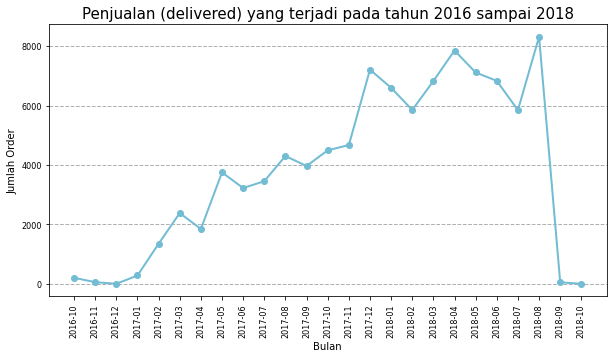

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(tren["delivered_month"], tren["order_id"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Penjualan (delivered) yang terjadi pada tahun 2016 sampai 2018", loc="center", fontsize=15)
plt.xlabel("Bulan")
plt.xticks(fontsize=8, rotation=90)
plt.ylabel("Jumlah Order")
plt.yticks(fontsize=8)
plt.grid(axis = 'y',linestyle = '--', linewidth = 1)
plt.show()

Grafik di atas menggambarkan bagaimana transaksi yang terjadi pada periode tahun 2016 hingga 2018 di Olist Store. Berdasarkan grafik tersebut terlihat bahwa transaksi per bulan pada periode tahun tersebut mengalami naik dan turun. Namun, secara garis besar dapat dikatakan bahwa jumlah transaksi meningkat dari Oktober 2016 hingga mendekati akhir periode.

Pada 2 bulan terakhir jumlah transaksi tidak turun drastis, lebih dari setengahnya bulan Agustus 2018. Saya berasumsi bahwa hal ini terjadi karena data ini direkam pada sekitar bulan Oktober 2018, sehingga semua transaksi belum sepenuhnya telah selesai, mengingat bahwa dataset yang digunakan adalah data dengan status pesanan `delivered` atau sudah diterima oleh customer.

Walaupun begitu dapat dilihat bahwa pada keseluruhan periode ini memberikan gambaran bahwa jumlah transaksi terus bertambah seiring jalannya waktu.

### Pertanyaan 2: Berapa lama proses pengiriman barang ke customer? Mulai dari pesanan dibuat sampai pesanan diterima customer. Apakah proses pengiriman sudah sesuai dengan estimasi waktu pengiriman yang dibuat oleh Olist Store?

In [102]:
del_cat

,delivered_time_cat,order_id
0,<=10 day,26052
2,<=6 day,26032
3,more than 15 day,23207
1,<=15 day,21174
4,same_day,13


In [103]:
estimated_cat

,est_cat,order_id
1,on_time,87791
0,late,7307
2,same_day,1380


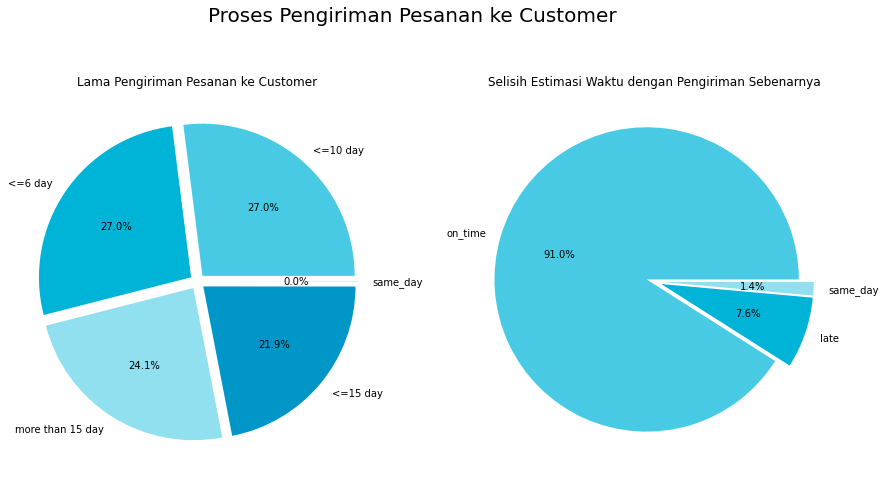

In [104]:
plt.figure(figsize=(15, 8))
colors = ("#48cae4","#00b4d8", "#90e0ef","#0096c7",'#0077b6')
explode1 = (0.05, 0.05, 0.05, 0.05, 0.05)
explode2 = (0.05, 0.05, 0.05)

plt.subplot(1, 2, 1)
plt.pie(
    x     =del_cat['order_id'],
    labels=del_cat['delivered_time_cat'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode1
)
plt.title("Lama Pengiriman Pesanan ke Customer", loc="center", fontsize=12)

plt.subplot(1, 2, 2)
plt.pie(
    x     =estimated_cat['order_id'],
    labels=estimated_cat['est_cat'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode2
)
plt.title("Selisih Estimasi Waktu dengan Pengiriman Sebenarnya", loc="center", fontsize=12)

plt.suptitle("Proses Pengiriman Pesanan ke Customer", fontsize=20)
plt.show()

Grafik di atas menggambarkan bagaimana pengiriman pesanan terjadi selama periode 2016 hingga 2018. Lama pengiriman pesanan saya bagi ke dalam beberapa kategori yaitu, `same_day` atau sampai di hari yang sama dengan pembuatan pesanan, `<= 6 day` atau kurang dari sama dengan 6 hari pengiriman, `<= 10 day` atau kurang dari sama dengan 10 hari pengiriman,  `<= 15 day` atau kurang dari sama dengan 15 hari pengiriman, dan `more than 15 day` untuk pesanan yang sampai lebih dari 15 hari. Angka-angka ini saya dapat dari nilai Q1, Q2, dan Q3.

Grafik sebelah kiri dapat mengilustrasikan bahwa lama pengiriman bervariasi sama rata, hampir dari masing-masing kategori lama pengiriman memenuhi 1/4 total pesanan. Namun perlu dilihat kembali bahwa pesanan dengan pengiriman di hari yang sama atau `same_day` hanya terdapat 13 pesanan, dan tidak sampai 1 % dari total pesanan. Lebih dari itu, satu hal lagi yang harus diperhatikan bahwa pengiriman yang lebih dari 15 hari pun mencapai 24,1%. Artinya masih terdapat pengiriman yang berlangsung lama. Hal ini dapat terjadi karena kesalahan pada mitra logistik atau karena faktor pengiriman yang jauh lokasinya.

Grafik sebelah kanan menunjukkan selisih antara estimasi waktu pengiriman dan lama pengiriman sebenarnya. Jika hasilnya positif artinya pesanan sampai di tangan customer sebelum estimasi waktu yang diberikan, kategori ini saya namakan `on_time`. Jika hasilnya sama dengan 0 artinya pesanan sampai di tangan customer tepat sesuai dengan estimasi waktu pengiriman, kategori ini saya namakan `same_day`. Sedangkan jika hasilnya negatif artinya pesanan sampai di tangan customer melewati estimasi waktu yang diberikan, kategori ini saya namakan `late`.

Bila mengacu pada grafik sebelah kanan maka didapatkan bahwa 91% pesanan diterima customer sebelum estimasi waktu. Dengan kata lain estimasi waktu yang diberikan oleh Olist Store sudah sangat baik memperkirakan lama pengiriman. Sebaliknya, dari mitra logistik juga sudah sangat baik melakukan tugasnya sehingga pesanan customer datang lebih cepat dari estimasi waktu pengiriman.

### Pertanyaan 3: Kategori produk apa saja yang menjadi favorit customer sepanjang periode 2016 sampai 2018?

In [105]:
favorite_category

,product_category_name_english,order_id
7,bed_bath_table,9272
43,health_beauty,8647
65,sports_leisure,7530
15,computers_accessories,6530
39,furniture_decor,6307
...,...,...
3,arts_and_craftmanship,23
52,la_cuisine,13
11,cds_dvds_musicals,12
29,fashion_childrens_clothes,7


In [106]:
fav_cat

,year_month,product_category_name_english,order_id
15,2016-10,furniture_decor,40
38,2016-11,health_beauty,10
46,2016-12,auto,1
63,2017-01,furniture_decor,62
102,2017-02,furniture_decor,170
154,2017-03,furniture_decor,289
185,2017-04,bed_bath_table,196
238,2017-05,bed_bath_table,323
295,2017-06,bed_bath_table,321
355,2017-07,bed_bath_table,461


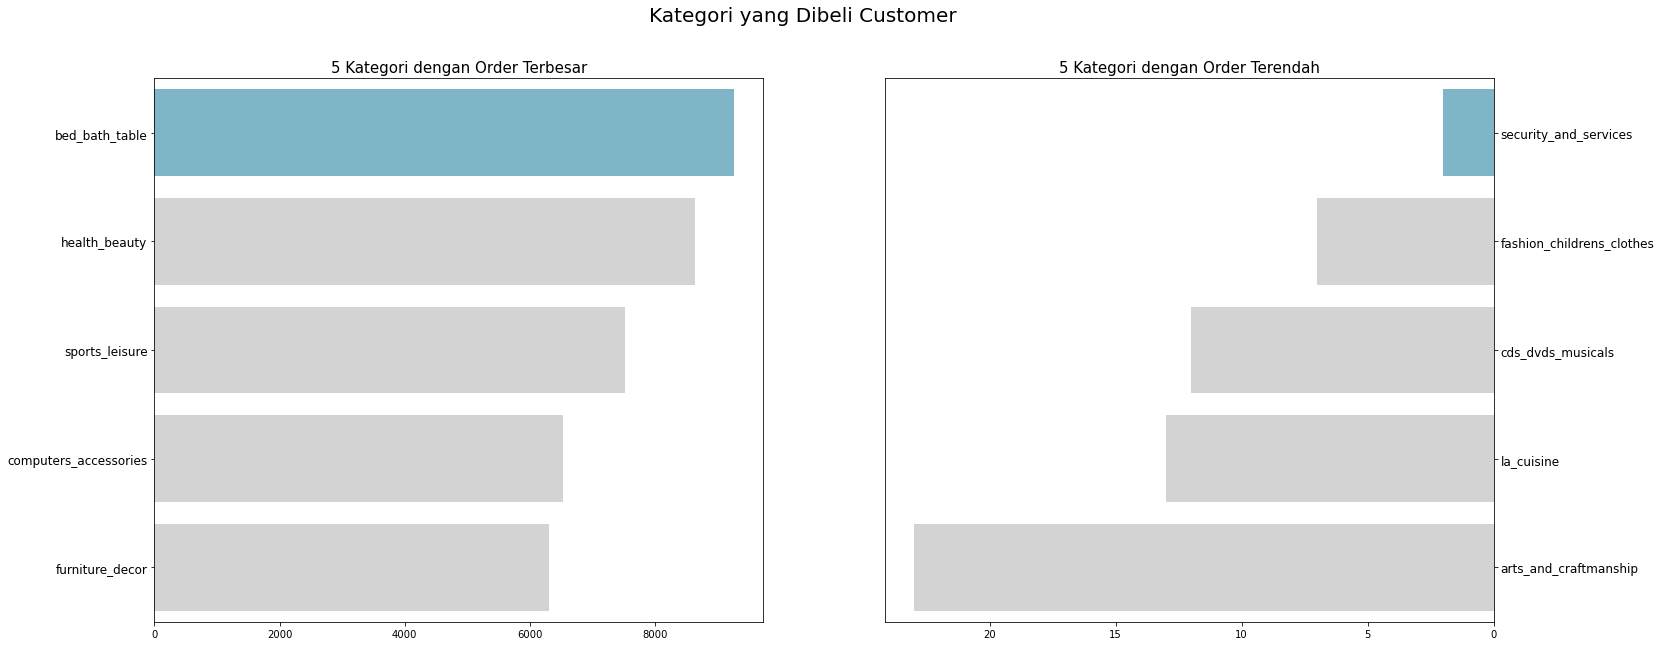

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name_english", data=favorite_category.sort_values(by='order_id',ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("5 Kategori dengan Order Terbesar", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name_english", data=favorite_category.sort_values(by='order_id',ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("5 Kategori dengan Order Terendah", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Kategori yang Dibeli Customer", fontsize=20)
plt.show()

Grafik sebelah kiri menunjukkan 5 kategori produk apa yang paling banyak dibeli oleh customer pada periode waktu 2016-2018. Sedangkan grafik sebelah kanan menunjukkan 5 kategori produk yang jarang dibeli oleh customer pada periode waktu tersebut.

Pada grafik sebelah kiri terlihat bahwa kategori produk `bed_bath_table` merupakan kategori produk yang paling banyak dibeli oleh customer dengan total pesanan 9272. Sedangkan pada grafik sebelah kanan terlihat bahwa kategori produk `security_and_services` merupakan produk yang jarang dibeli oleh customer dengan total pesanan 2.

Pada kedua grafik tersebut terlihat bahwa masing-masing 5 kategori yang paling banyak dibeli maupun paling jarang dibeli merupakan kategori yang sangat berbeda. Sehingga tidak dapat dilihat kategori besar apa yang sering dibeli ataupun jarang dibeli.

### Pertanyaan 4: Metode pembayaran apa saja yang banyak digunakan customer untuk bertransaksi sepanjang periode 2016 sampai 2018?

In [108]:
favorite_payment

,payment_type,order_id,payment_value
1,credit_card,74304,15190241.73
0,boleto,19191,3943080.78
3,voucher,3679,396110.42
2,debit_card,1485,246727.51


In [109]:
favorite_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   payment_type   4 non-null      object 
 1   order_id       4 non-null      int64  
 2   payment_value  4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.0+ bytes


In [110]:
credit_card = favorite_payment[favorite_payment.payment_type=='credit_card']
credit_card['payment_value']

1    15190241.73
Name: payment_value, dtype: float64

In [111]:
fav_pay

,year_month,payment_type,order_id
1,2016-10,credit_card,160
5,2016-11,credit_card,46
8,2016-12,credit_card,3
10,2017-01,credit_card,201
14,2017-02,credit_card,1018
18,2017-03,credit_card,1795
22,2017-04,credit_card,1403
26,2017-05,credit_card,2854
30,2017-06,credit_card,2442
34,2017-07,credit_card,2614


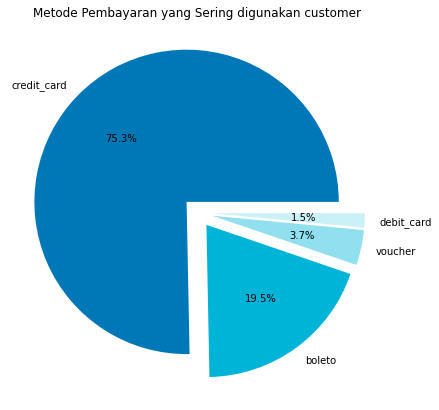

In [112]:
plt.figure(figsize=(15, 7))
colors = ("#0077b6", "#00b4d8", "#90e0ef", "#caf0f8")
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(
    x     =favorite_payment['order_id'],
    labels=favorite_payment['payment_type'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title('Metode Pembayaran yang Sering digunakan customer', loc="center", fontsize=12)
plt.show()

Grafik pie di atas merupakan perbandingan metode pembayaran yang digunakan oleh customer dalam bertransaksi di Olist Store. Berdasarkan grafik tersebut terlihat bahwa 75.3% dari total customer menggunakan `credit_card` sebagai metode pembayaran yang paling banyak digunakan customer. Bahkan apabila kita lihat pada dataframe `fav_pay` terlihat bahwa hampir setiap bulan pada periode 2016-2018`credit_card` menjadi metode pembayaran yang sering digunakan. Hal ini bisa terjadi mungkin karena budaya di daerah setempat yang terbiasa menggunakan `credit_card` dalam setiap transaksinya. Asumsi ini perlu diperkuat lagi dengan data tambahan berupa perbandingan jumlah pengguna `credit_card` dengan jumlah penduduk di daerah setempat. Dengan begitu dapat terlihat apakah hampir semua penduduk (yang memenuhi kriteria pengguna credit card) memiliki `credit_card` atau tidak. Bila betul bahwa hampir semua penduduk tersebut memiliki `credit_card`, maka besar kemungkinan bahwa `credit_card` sudah menjadi metode pembayaran pada setiap transaksi mereka.

### Pertanyaan 5: Bagaimana kepuasan customer terhadap pengalaman berbelanja di Olist Store? Apakah ada korelasi antara kepuasan customer dengan lama proses pengiriman?

In [113]:
review

,review_score,order_id
0,1,9380
1,2,2938
2,3,7942
3,4,18943
4,5,56817


In [114]:
cat_review

,product_category_name_english,review_score,order_id
29,fashion_childrens_clothes,5.000000,7
11,cds_dvds_musicals,4.642857,12
9,books_imported,4.525424,50
8,books_general_interest,4.502752,492
64,small_appliances_home_oven_and_coffee,4.453333,72
...,...,...,...
30,fashion_male_clothing,3.649635,105
46,home_comfort_2,3.642857,23
57,office_furniture,3.552376,1244
23,diapers_and_hygiene,3.378378,25


In [115]:
deli_cat

,delivered_time_cat,order_id,review_score
2,<=6 day,25919,4.338155
0,<=10 day,25909,4.244633
1,<=15 day,21043,4.163807
3,more than 15 day,22947,3.515354
4,same_day,13,3.421053


In [116]:
diff_deli_est

,est_cat,order_id,review_score
1,on_time,87316,4.208547
2,same_day,1369,4.080026
0,late,7146,2.443879


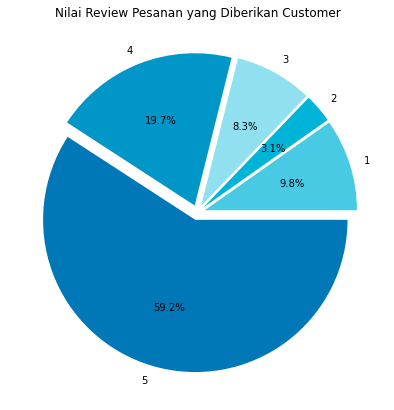

In [117]:
plt.figure(figsize=(15, 7))

colors = ("#48cae4","#00b4d8", "#90e0ef","#0096c7",'#0077b6')
explode = (0.05,0.05,0.05,0.05,0.05)

plt.pie(
    x     =review['order_id'],
    labels=review['review_score'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title('Nilai Review Pesanan yang Diberikan Customer', loc="center", fontsize=12)
plt.show()

Grafik di atas menunjukkan perbandingan nilai review pesanan yang diberikan customer. Nilai review tersebut ada pada rentang 1-5. Berdasarkan grafik tersebut, sebanyak 59.2% customer memberikan nilai review 5, sebanyak 19.7% memberikan nilai review 4. Hal ini berarti bahwa lebih dari 75% customer memberikan review lebih dari sama dengan 4. Berdasarkan fakta tersebut dapat dikatakan bahwa pelayanan yang diberikan Olist Store sudah cukup baik. Namun perlu diperhatikan bahwa penilaian tersebut melibatkan banyak faktor seperti kualitas aplikasi atau web Olist Store dalam hal ini User Interface dan User Experience, kemudian dapat juga berdasarkan pilihan barang dan pelayanan yang diberikan seller, atau juga dapat berdasarkan kecepatan dan ketepatan pengiriman.

Oleh karena itu saya mencoba melihat kembali pengaruh dari faktor-faktor tersebut pada visualisasi selanjutnya.

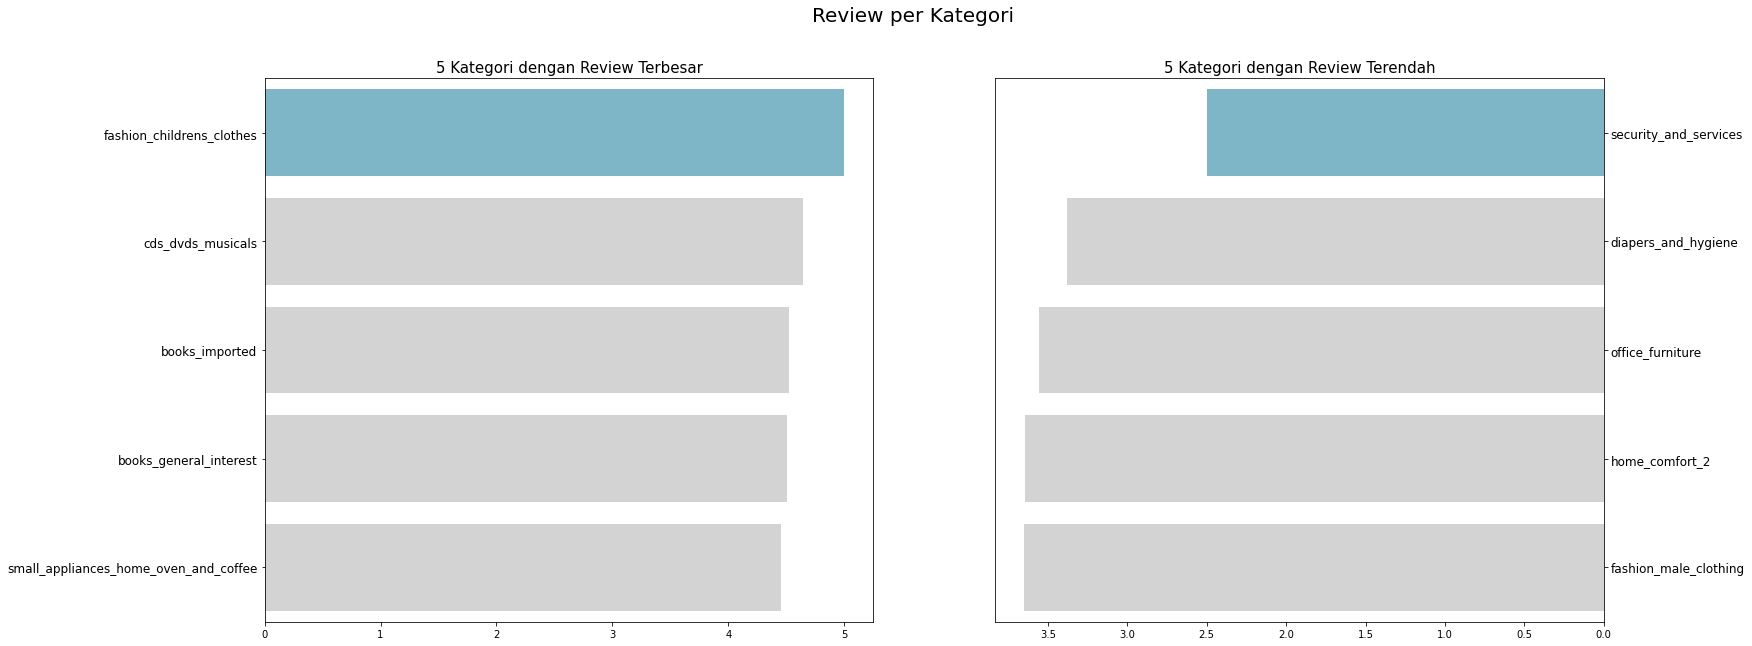

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", data=cat_review.sort_values(by='review_score',ascending=False ).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("5 Kategori dengan Review Terbesar", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="review_score", y="product_category_name_english", data=cat_review.sort_values(by='review_score',ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("5 Kategori dengan Review Terendah", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Review per Kategori", fontsize=20)
plt.show()

Grafik di atas menunjukkan 5 kategori barang yang memiliki nilai review tertinggi dan terendah. Terlihat bahwa kategori `fashion_childrens_clothes` memiliki penilaian sempuran yaitu 5. Namun apabila dilihat kembali ke kategori yang jarang dibeli customer, kategori ini termasuk dalam urutan ke-2 kategori yang jarang dibeli. Menurut saya ini kurang merepresentasikan nilai dari kategori produk tersebut karena jumlah sampel yang sedikit. Oleh karena itu saya mencoba memfilter kembali dataset tersebut dengan mengembalikan kategori produk yang jumlah pesanannya lebih dari 100. Hal ini memungkinkan penilaian yang lebih baik dan merepresentasikan populasi dengan banyaknya sampel

   product_category_name_english  review_score  order_id
8         books_general_interest      4.502752       492
10               books_technical      4.396226       255
37                    food_drink      4.387900       221
53           luggage_accessories      4.330420      1015
31                 fashion_shoes      4.272388       231
   product_category_name_english  review_score  order_id
57              office_furniture      3.552376      1244
30         fashion_male_clothing      3.649635       105
34               fixed_telephony      3.755814       209
4                          audio      3.845333       345
7                 bed_bath_table      3.915276      9177


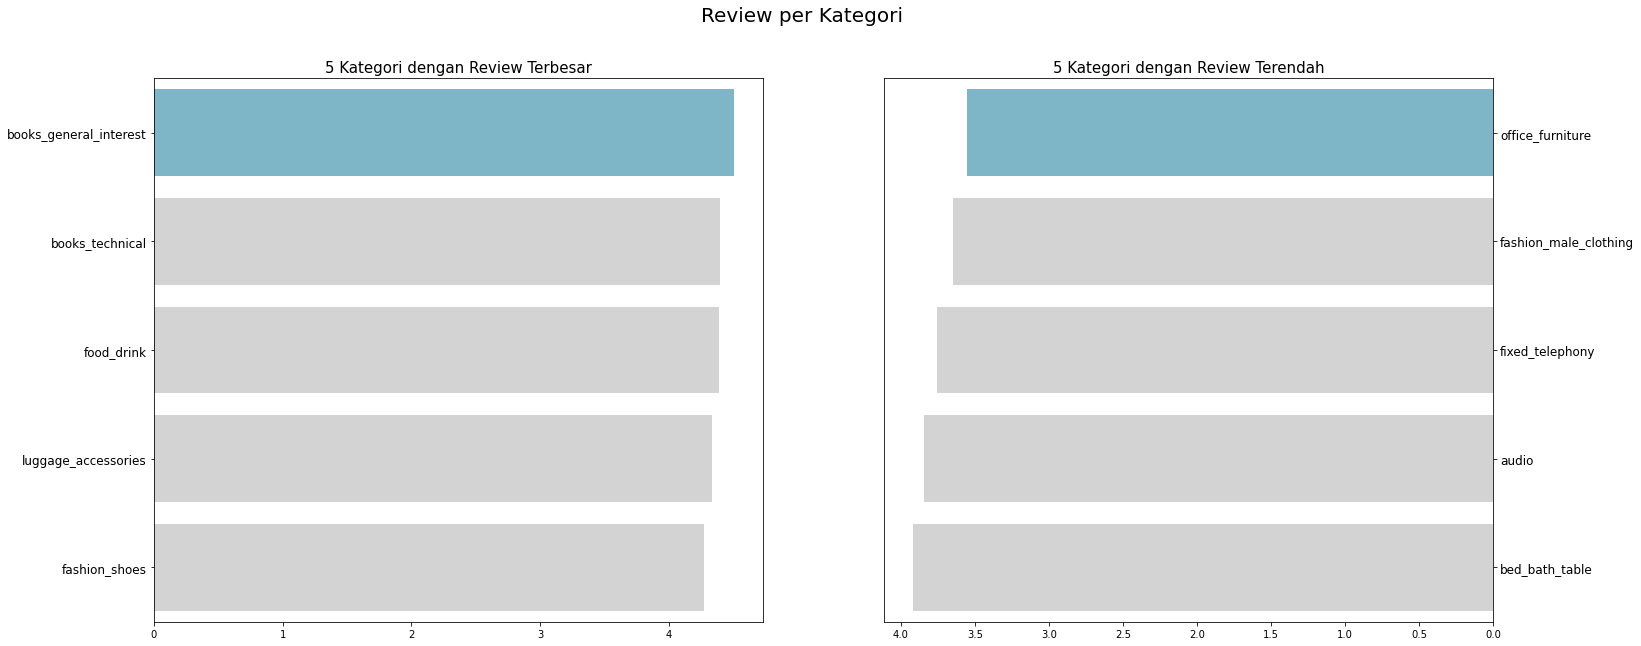

In [119]:
cat_review = cat_review[cat_review.order_id>100]
print(cat_review.sort_values('review_score',ascending=False).head(5))
print(cat_review.sort_values('review_score',ascending=True).head(5))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", data=cat_review.sort_values(by='review_score',ascending=False ).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("5 Kategori dengan Review Terbesar", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="review_score", y="product_category_name_english", data=cat_review.sort_values(by='review_score',ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("5 Kategori dengan Review Terendah", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Review per Kategori", fontsize=20)
plt.show()

Setelah dilakukan filtering, terlihat bahwa kategori `books_general_interest` menjadi kategori produk dengan rata-rata nilai review tertinggi yaitu 4.502752 dan memiliki total pesanan 492. Sedangkan kategori `office_furniture` menjadi kategori produk dengan rata-rata nilai review terendah yaitu 3.552376 memiliki total pesanan 1244.

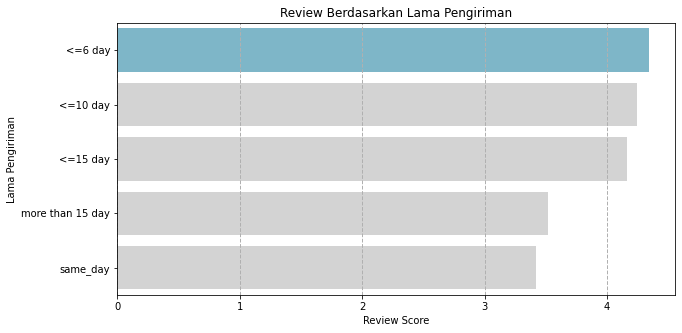

In [120]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="delivered_time_cat", data=deli_cat.sort_values(by='review_score',ascending=False ), palette=colors)
plt.title('Review Berdasarkan Lama Pengiriman')
plt.xlabel('Review Score')
plt.ylabel('Lama Pengiriman')
plt.grid(axis = 'x',linestyle = '--', linewidth = 1)
plt.show()

Grafik di atas menunjukkan review berdasarkan lama pengiriman. Pada grafik tersebut terlihat bahwa pengiriman kurang dari 6 hari memiliki rata-rata nilai review tertinggi yaitu 4.338155. Sedangkan pesanan yang sampai di hari yang sama dengan hari pemesanan justru memiliki nilai review yang paling rendah yaitu 3.421053. Niali review yang kurang baik ini memiliki beberapa kemungkinan seperti, kurangnya sampel sehingga tidak dapat memberikan nilai optimal dari penilaian tersebut. Selain itu kurang baiknya nilai review dari customer diakibatkan oleh proses pesanan yang terlalu cepat sehingga detail pesanan tidak terkirim dengan baik. Misalnya seperti salah ukuran atau salah produk. Tentunya asumsi ini perlu dilakukan analisa lebih mendalam lagi melalui `comment_review` yang menggambarkan situasi yang terjadi pada pesanan tersebut.

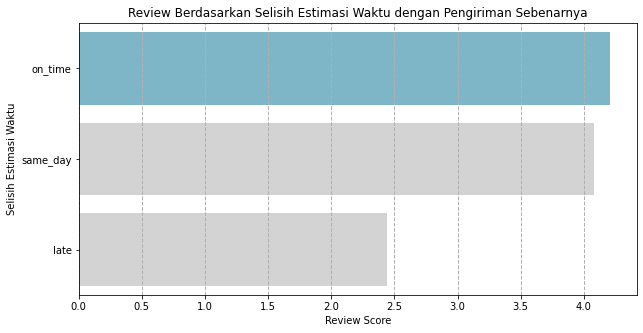

In [121]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="est_cat", data=diff_deli_est.sort_values(by='review_score',ascending=False ), palette=colors)
plt.title('Review Berdasarkan Selisih Estimasi Waktu dengan Pengiriman Sebenarnya')
plt.xlabel('Review Score')
plt.ylabel('Selisih Estimasi Waktu')
plt.grid(axis = 'x',linestyle = '--', linewidth = 1)
plt.show()

Grafik di atas menunjukkan review berdasarkan selisih estimasi waktu dengan pengiriman sebenarnya. Berdasarkan grafik di atas terlihat bahwa pesanan yang `on_time` memberikan rata-rata nilai review paling tinggi yaitu, 4.208547.

Sedangkan pesanan dengan selisih estimasi waktu `late` memiliki rata-rata nilai review paling rendah yaitu, 2.443879. Hal ini sangat wajar karena pesanan-pesanan tersebut telah melewati estimasi waktu yang diberikan oleh Olist Store. Masalah ini dapat terjadi karena kesalahan yang terjadi pada seller atau pun kendala pengiriman pada mitra logistik. Selain itu, jarak antara seller dan cutomer yang terlampau jauh dapat menjadi faktor keterlambatan pengiriman.

In [122]:
reviews = delivered_review[['delivered_time','diff_est_del','review_score']]
reviews

,delivered_time,diff_est_del,review_score
0,8.0,7.0,4
1,8.0,7.0,4
2,8.0,7.0,4
3,2.0,10.0,4
4,5.0,7.0,5
...,...,...,...
114854,12.0,8.0,4
114855,12.0,8.0,4
114856,37.0,-9.0,1
114857,8.0,10.0,5


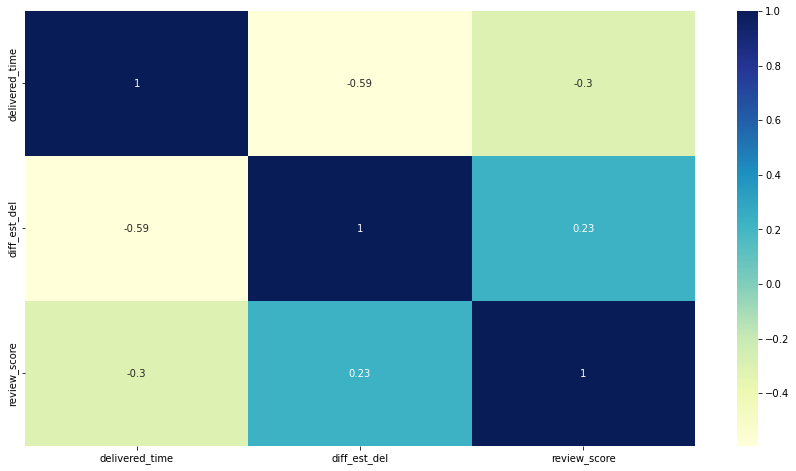

In [123]:
fig = plt.figure(figsize=(15, 8))
dataplot=sns.heatmap(reviews.corr(), cmap="YlGnBu", annot=True)

plt.show()

Selanjutnya akan dilihat korelasi antara nilai review dengan lama pengiriman dan korelasi nilai review dengan selisih estimasi waktu dan pengiriman sebenarnya. Dengan menggunakan fitur heatmap dari library seaborn didapat heatmap plot seperti di atas ini.

Berdasarkan heatmap plot di atas didapat bahwa:
- Nilai review dan lama pengiriman berelasi negatif. Artinya semakin lama waktu pengiriman maka semakin kecil nilai review yang akan diberikan customer.
- Nilai review dan selisih estimasi waktu dengan pengiriman sebenarnya berelasi posisif. Artinya bahwa semakin besar selisih estimasi waktu dengan pengiriman sebenarnya maka semakin besar pula nilai review yang akan diberikan customer.

## Conclusion

1. Bagaimana penjualan (delivered) yang terjadi pada tahun 2016 sampai 2018?

   Transaksi per bulan pada periode tahun 2016 sampai 2018 mengalami naik dan turun. Namun, secara garis besar dapat dikatakan bahwa jumlah transaksi meningkat dari Oktober 2016 hingga mendekati akhir periode.
2. Berapa lama proses pengiriman barang ke customer? Mulai dari pesanan dibuat sampai pesanan diterima customer. Apakah proses pengiriman sudah sesuai dengan estimasi waktu pengiriman yang dibuat oleh Olist Store?

  Rata-rata lama pengiriman adalah 12 hari dengan median 10 hari. Dengan kata lain distibusi lama pengirimannya adalah *right-skewed*. Hal ini terjadi karena ada sejumlah pesanan dengan waktu pengiriman yang terlalu lama yang menyebabkan outlier.

  Estimasi waktu yang diberikan oleh Olist Store sudah sangat baik memperkirakan lama pengiriman. Pada lain sisi, dari mitra logistik juga sudah sangat baik melakukan tugasnya sehingga pesanan customer datang lebih cepat dari estimasi waktu pengiriman.
3. Kategori produk apa saja yang menjadi favorit customer sepanjang periode 2016 sampai 2018?

  Produk `bed_bath_table` merupakan kategori produk yang paling banyak dibeli oleh customer dengan total pesanan 10953. Sedangkan kategori produk `security_and_services` merupakan produk yang jarang dibeli oleh customer dengan total pesanan 2.
4. Metode pembayaran apa saja yang banyak digunakan customer untuk bertransaksi sepanjang periode 2016 sampai 2018?

  `credit_card` merupakan metode pembayaran yang paling banyak digunakan customer. Hampir setiap bulan pada periode 2016-2018 `credit_card` menjadi metode pembayaran yang sering digunakan.
5. Bagaimana kepuasan customer terhadap pengalaman berbelanja di Olist Store? Apakah ada korelasi antara kepuasan customer dengan lama proses pengiriman?

  Secara keseluruhan, lebih dari 75% customer memberikan review yang baik terhadap pengalaman berbelanja di Olist Store dengan memberikan nilai review lebih dari sama dengan 4.

  Terdapat korelasi antara kepuasan customer dengan lama proses pengiriman sebagai berikut:
  - Nilai review dan lama pengiriman berelasi negatif. Artinya semakin lama waktu pengiriman maka semakin kecil nilai review yang akan diberikan customer.
  - Nilai review dan selisih estimasi waktu dengan pengiriman sebenarnya berelasi posisif. Artinya bahwa semakin besar selisih estimasi waktu dengan pengiriman sebenarnya maka semakin besar pula nilai review yang akan diberikan customer.

### to csv

In [124]:
delivered_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114589 entries, 0 to 114858
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114589 non-null  object        
 1   customer_id                    114589 non-null  object        
 2   product_id                     114589 non-null  object        
 3   seller_id                      114589 non-null  object        
 4   order_item_id                  114589 non-null  int64         
 5   product_category_name_english  112943 non-null  object        
 6   product_category_name          114589 non-null  object        
 7   price                          114589 non-null  float64       
 8   order_status                   114589 non-null  object        
 9   order_delivered_customer_date  114589 non-null  datetime64[ns]
 10  delivered_month                114589 non-null  datetime64[ns]
 11  

In [125]:
olist_df = delivered_review
olist_df.drop(['product_category_name_english'], axis=1,inplace=True)
olist_df

,order_id,customer_id,product_id,seller_id,order_item_id,product_category_name,price,order_status,order_delivered_customer_date,delivered_month,...,estimated_time,diff_est_del,est_cat,year_month,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,2017-10-01,...,15.0,7.0,on_time,2017-10,1,credit_card,1,18.12,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,2017-10-01,...,15.0,7.0,on_time,2017-10,3,voucher,1,2.00,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,29.99,delivered,2017-10-10 21:25:13,2017-10-01,...,15.0,7.0,on_time,2017-10,2,voucher,1,18.59,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,29.99,delivered,2017-08-18 14:44:43,2017-08-01,...,12.0,10.0,on_time,2017-08,1,credit_card,3,37.77,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,29.99,delivered,2017-08-07 18:30:01,2017-08-01,...,12.0,7.0,on_time,2017-08,1,credit_card,1,37.77,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114854,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,1,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,2017-08-01,...,20.0,8.0,on_time,2017-08,1,credit_card,10,748.24,4,
114855,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2,esporte_lazer,356.00,delivered,2017-08-23 15:36:29,2017-08-01,...,20.0,8.0,on_time,2017-08,1,credit_card,10,748.24,4,
114856,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,1,instrumentos_musicais,55.90,delivered,2018-01-26 15:45:14,2018-01-01,...,28.0,-9.0,late,2018-01,1,credit_card,1,71.04,1,"Ele não é um mini cajon, é um shaker, ou seja,..."
114857,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1,beleza_saude,72.00,delivered,2017-03-17 15:08:01,2017-03-01,...,18.0,10.0,on_time,2017-03,1,credit_card,3,85.08,5,


In [126]:
olist_df.isna().sum()

order_id                         0
customer_id                      0
product_id                       0
seller_id                        0
order_item_id                    0
product_category_name            0
price                            0
order_status                     0
order_delivered_customer_date    0
delivered_month                  0
delivered_time                   0
delivered_time_cat               0
estimated_time                   0
diff_est_del                     0
est_cat                          0
year_month                       0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_comment_message           0
dtype: int64

In [127]:
olist_df = pd.merge(olist_df,category_df,on='product_category_name',how='inner')
columns = olist_df.columns.tolist()
columns = [columns[0], columns[1], columns[2], columns[3], columns[4], columns[5], columns[22], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11],
           columns[12], columns[13], columns[14], columns[15], columns[16], columns[17], columns[18], columns[19], columns[20], columns[21]]
olist_df = olist_df[columns]
olist_df

,order_id,customer_id,product_id,seller_id,order_item_id,product_category_name,product_category_name_english,price,order_status,order_delivered_customer_date,...,estimated_time,diff_est_del,est_cat,year_month,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,housewares,29.99,delivered,2017-10-10 21:25:13,...,15.0,7.0,on_time,2017-10,1,credit_card,1,18.12,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,housewares,29.99,delivered,2017-10-10 21:25:13,...,15.0,7.0,on_time,2017-10,3,voucher,1,2.00,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,housewares,29.99,delivered,2017-10-10 21:25:13,...,15.0,7.0,on_time,2017-10,2,voucher,1,18.59,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,housewares,29.99,delivered,2017-08-18 14:44:43,...,12.0,10.0,on_time,2017-08,1,credit_card,3,37.77,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,utilidades_domesticas,housewares,29.99,delivered,2017-08-07 18:30:01,...,12.0,7.0,on_time,2017-08,1,credit_card,1,37.77,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112938,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,4a24717893a6c8f3cfcf9843b8987d15,2cb6eb1b7185064167657fa09f541105,1,artes_e_artesanato,arts_and_craftmanship,25.00,delivered,2018-08-09 21:42:08,...,6.0,0.0,same_day,2018-08,1,boleto,1,33.69,5,
112939,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,1,artes_e_artesanato,arts_and_craftmanship,19.00,delivered,2018-07-27 14:04:10,...,13.0,10.0,on_time,2018-07,1,credit_card,1,84.63,3,"Um dos frisadores que comprei, especificamente..."
112940,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2,artes_e_artesanato,arts_and_craftmanship,39.90,delivered,2018-07-27 14:04:10,...,13.0,10.0,on_time,2018-07,1,credit_card,1,84.63,3,"Um dos frisadores que comprei, especificamente..."
112941,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,1,seguros_e_servicos,security_and_services,183.29,delivered,2017-02-14 16:24:01,...,39.0,20.0,on_time,2017-02,1,credit_card,1,209.06,4,Envio muito rápido. Recomendo.


In [128]:
olist_df['order_delivered_customer_date'] = olist_df['order_delivered_customer_date'].dt.strftime('%Y-%m-%d')
olist_df['order_delivered_customer_date']

0         2017-10-10
1         2017-10-10
2         2017-10-10
3         2017-08-18
4         2017-08-07
             ...    
112938    2018-08-09
112939    2018-07-27
112940    2018-07-27
112941    2017-02-14
112942    2017-09-28
Name: order_delivered_customer_date, Length: 112943, dtype: object

In [129]:
olist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112943 entries, 0 to 112942
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112943 non-null  object        
 1   customer_id                    112943 non-null  object        
 2   product_id                     112943 non-null  object        
 3   seller_id                      112943 non-null  object        
 4   order_item_id                  112943 non-null  int64         
 5   product_category_name          112943 non-null  object        
 6   product_category_name_english  112943 non-null  object        
 7   price                          112943 non-null  float64       
 8   order_status                   112943 non-null  object        
 9   order_delivered_customer_date  112943 non-null  object        
 10  delivered_month                112943 non-null  datetime64[ns]
 11  

In [130]:
olist_df.drop(['order_status'],axis=1,inplace=True)

In [131]:
olist_df.to_csv('olist_df.csv', index=False)